<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


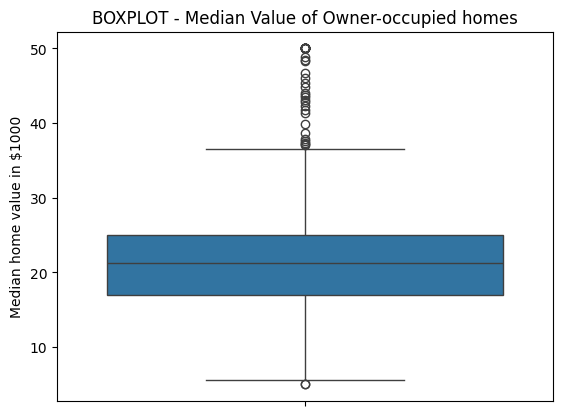

In [22]:
##boxplot
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title("BOXPLOT - Median Value of Owner-occupied homes")
pyplot.ylabel("Median home value in $1000")
pyplot.show()



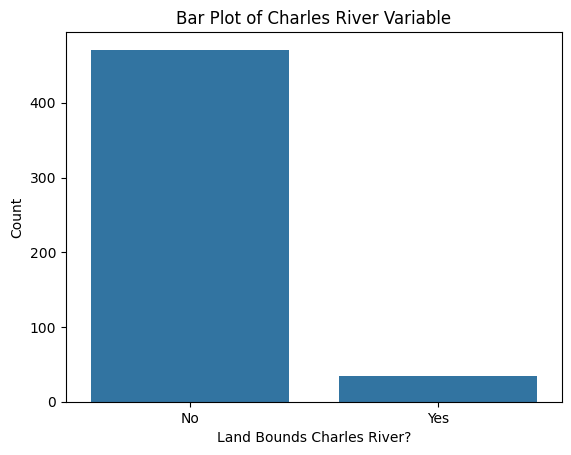

In [27]:
#bar plot for the Charles river variable
value_counts = boston_df["CHAS"].value_counts()

sns.barplot(x=value_counts.index, y=value_counts.values)

pyplot.xticks([0, 1], ["No", "Yes"]) 
pyplot.xlabel("Land Bounds Charles River?")
pyplot.ylabel("Count")
pyplot.title("Bar Plot of Charles River Variable")

pyplot.show()

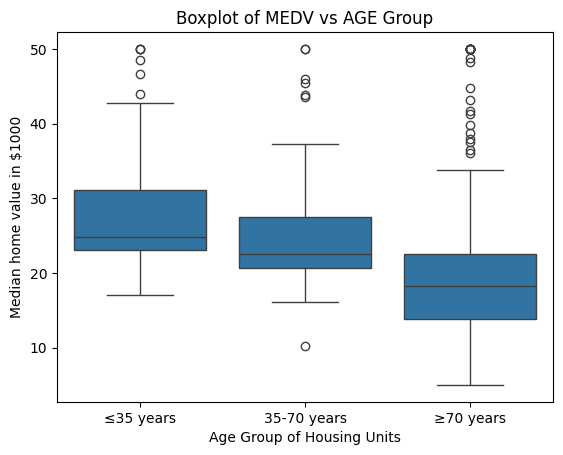

In [33]:
##Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

medv_column = "MEDV" 
age_column = "AGE"  

# Categorize AGE into three groups
boston_df["AGE_group"] = pd.cut(boston_df[age_column], 
                         bins=[0, 35, 70, 100], 
                         labels=["≤35 years", "35-70 years", "≥70 years"])

# Create the boxplot
sns.boxplot(x=boston_df["AGE_group"], y=boston_df[medv_column])

# Customize the plot
pyplot.xlabel("Age Group of Housing Units")
pyplot.ylabel("Median home value in $1000")
pyplot.title("Boxplot of MEDV vs AGE Group")
#pyplot.grid(axis="y", linestyle="--", alpha=0.7)

pyplot.show()




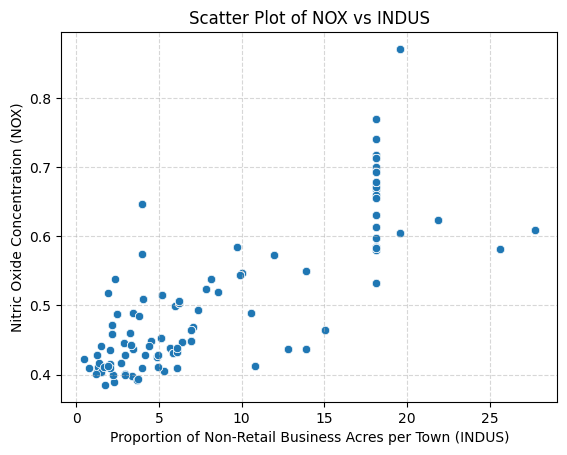

In [35]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(x=boston_df["INDUS"], y=boston_df["NOX"])


pyplot.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
pyplot.ylabel("Nitric Oxide Concentration (NOX)")
pyplot.title("Scatter Plot of NOX vs INDUS")
pyplot.grid(True, linestyle="--", alpha=0.5)


pyplot.show()

# the scatterplot suggests that the bigger the non-retail business land the higher the nitrix oxides concetration exists - they show a positive trend

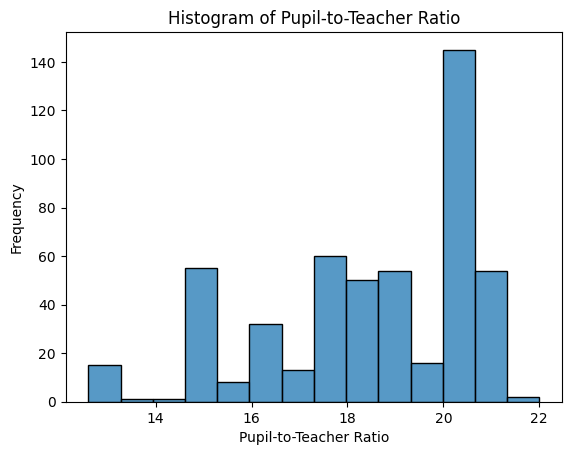

In [38]:
##Create a histogram for the pupil to teacher ratio variable

sns.histplot(boston_df["PTRATIO"])

pyplot.xlabel("Pupil-to-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.title("Histogram of Pupil-to-Teacher Ratio")


pyplot.show()

In [43]:
##Is there a significant difference in the median value of houses bounded by the Charles river or not?
from scipy.stats import ttest_ind

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# since the p-value is smaller than 0.05 we cannot assume equality of variance

t_stat, p_value = ttest_ind(boston_df[boston_df["CHAS"] == 1]["MEDV"],
                            boston_df[boston_df["CHAS"] == 0]["MEDV"], equal_var=False)  


print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Conclusion

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median home values bounded by the Charles river.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median home values bounded by the Charles river.")



T-statistic: 3.1133, P-value: 0.0036
Reject the null hypothesis: There is a significant difference in median home values bounded by the Charles river.


In [46]:
##Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
from scipy.stats import f_oneway

boston_df["AGE_group"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["≤35 years", "35-70 years", "≥70 years"])


group1 = boston_df[boston_df["AGE_group"] == "≤35 years"]["MEDV"]
group2 = boston_df[boston_df["AGE_group"] == "35-70 years"]["MEDV"]
group3 = boston_df[boston_df["AGE_group"] == "≥70 years"]["MEDV"]


f_stat, p_value = f_oneway(group1, group2, group3)


print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median home values across age groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median home values across age groups.")

F-statistic: 36.4076, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in median home values across age groups.


In [47]:
##Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
from scipy.stats import pearsonr

nox_column = "NOX"  
industrial_column = "INDUS" 

corr_coeff, p_value = pearsonr(boston_df[nox_column], boston_df[industrial_column])


print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}, P-value: {p_value:.4f}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7637, P-value: 0.0000
Reject the null hypothesis: There is a significant correlation between NOX and INDUS.


In [49]:
##What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

import statsmodels.api as sm

X = boston_df["DIS"]  
y = boston_df["MEDV"]  
# Add constant to the model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

# Interpretation:
p_value_dis = model.pvalues["DIS"]
if p_value_dis < alpha:
    print("Reject the null hypothesis: Distance to employment centers significantly impacts median home value.")
else:
    print("Fail to reject the null hypothesis: Distance to employment centers does not significantly impact median home value.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        22:58:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0